In [1]:
import numpy as np
from scipy.ndimage import laplace, sobel
from PIL import Image
from Siren import GradientUtils
import torch

In [2]:
def generate_coordinates(n):
    """Generate regular grid of 2D coorindates

    Args:
        n (int): Number of points per dimension
    Returns:
        coord_abs: np.ndarray
        Array of row and column coordinates

    """
    rows, cols = np.meshgrid(range(n), range(n), indexing='ij')
    coord_abs = np.stack([rows.ravel(), cols.ravel()], axis=-1)

    return coord_abs

In [3]:
rows, cols =np.meshgrid(range(10),range(10),indexing='ij')
coords=generate_coordinates(200)

In [4]:
print("Rows",rows)
print("Columns",cols)

Rows [[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
Columns [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [5]:
print("Falltened Rows",rows.ravel(),"\nFlattened Columns",cols.ravel())
print("Falltened Rows",len(rows.ravel()),"\nFlattened Columns",len(cols.ravel()))
print("Datapoints",len(np.stack([rows.ravel(), cols.ravel()],axis=-1)))
print(np.stack([rows.ravel(), cols.ravel()],axis=-1))


Falltened Rows [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9] 
Flattened Columns [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Falltened Rows 100 
Flattened Columns 100
Datapoints 100
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 

In [6]:
path="./dog.png"
img=Image.open(path)
img=np.array(img.resize((128,128)))

if not (img.ndim == 2 and img.shape[0] == img.shape[1]):
    raise ValueError("Only 2D square images are supported")

FileNotFoundError: [Errno 2] No such file or directory: './dog.png'

In [8]:
x=torch.tensor([1.] , requires_grad=True)

In [9]:
loss=x ** 3 + 2 * (x ** 2 ) + 5 * x + 7
loss

tensor([15.], grad_fn=<AddBackward0>)

In [10]:
dxloss=torch.autograd.grad(loss,x,create_graph=True)[0]
dxloss

tensor([12.], grad_fn=<AddBackward0>)

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# url = 'http://192.168.0.102:4747/video'
# while True:                                                                                                                    
#     imgResp = requests.get(url)
#     imgNp = np.array(bytearray(imgResp.content), dtype=np.uint8)
#     img = cv2.imdecode(imgNp, -1)
#     cap = cv2.VideoCapture(url) 


8000 (268237, 2)
first five coords [[-114   23]
 [-241    3]
 [-285  -29]
 [-109   44]
 [ -50   12]]


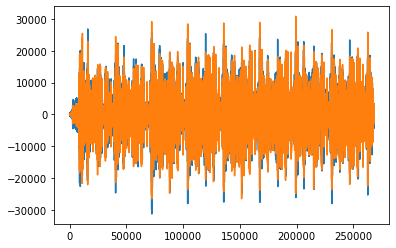

In [14]:
import scipy.io.wavfile as wavfile
path="./data/audio.wav"

rate,data=wavfile.read(path)
print(rate,data.shape)

print(f"first five coords {data[:5]}")

plt.plot(data)

The shape of the data is (268237,)
first five coords [ -45.5 -119.  -157.   -32.5  -19. ]


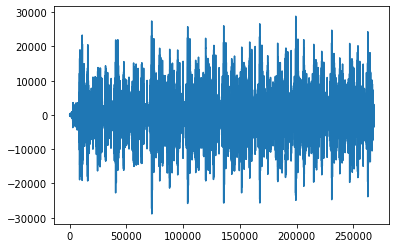

In [15]:
data_resized=np.mean(data,axis=1)
print(f"The shape of the data is",data_resized.shape)
print(f"first five coords {data_resized[:5]}")

plt.plot(data_resized)


Grids shape is (268237,)
tensor([[-100.0000],
        [ -99.9993],
        [ -99.9985],
        ...,
        [  99.9985],
        [  99.9993],
        [ 100.0000]])


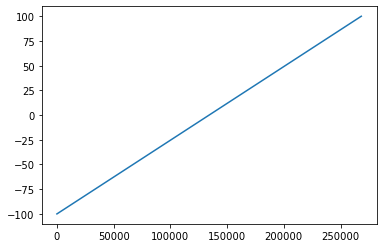

In [18]:
path="./data/audio.wav"
dataset=AudioDataset(path)
grid=np.linspace(start=-100,stop=100,num=dataset.file_length)
print(f"Grids shape is",grid.shape)
print(torch.Tensor(grid).view(-1,1))
plt.plot(grid)
# dataset=ImplicitAudioWrapper(dataset)

In [19]:
data,rate=dataset[1]
print("Maximum before absolute function",np.max(data))
print("Minimum before absolute function",np.min(data))

Maximum before absolute function 28805.0
Minimum before absolute function -28882.5


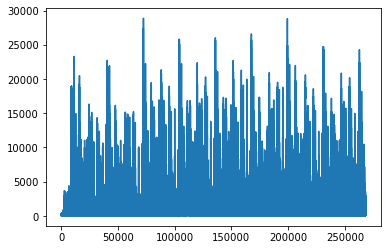

In [20]:
data,rate=dataset[1]
absolute_data=np.abs(data)

plt.plot(absolute_data)

In [21]:
max_absolute_data=np.max(np.abs(data))
print("Maximum Number is",max_absolute_data)

Maximum Number is 28882.5


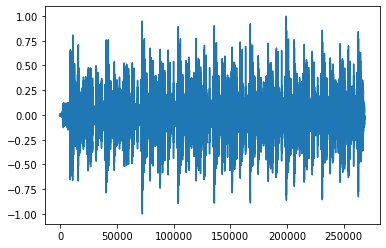

In [26]:
plt.plot((data/max_absolute_data))

In [43]:
audio_path = "./data/CantinaBand3.wav"
audio_dataset = AudioDataset(audio_path)
print("Audio dataset len", audio_dataset.file_length)
coord_dataset = ImplicitAudioWrapper(audio_dataset)

Audio dataset len 66150


In [83]:
x = (2*np.random.rand(2, 40000) - 1).astype(np.float32)
print(x.shape)
print(x)

(2, 40000)
[[-0.32519805 -0.6380923   0.5474412  ... -0.26474905  0.5984516
  -0.21350631]
 [ 0.32064533 -0.8300483   0.8973933  ...  0.43655965  0.06740827
  -0.35389093]]


In [87]:
 y = (x*32767).astype('int16')
print(y.shape)
 y

(2, 40000)


array([[-10655, -20908,  17938, ...,  -8675,  19609,  -6995],
       [ 10506, -27198,  29404, ...,  14304,   2208, -11595]], dtype=int16)

In [92]:
print(y.T)
print(y.shape)

[[-10655  10506]
 [-20908 -27198]
 [ 17938  29404]
 ...
 [ -8675  14304]
 [ 19609   2208]
 [ -6995 -11595]]
(2, 40000)


In [94]:
wavfile.write('foo.wav', 44100, y.T)


In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU, Sequential
from torch.utils.data import DataLoader
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from Siren import ImageSiren, AudioDataset, ImplicitAudioWrapper

In [46]:
write??

Signature: write(filename, rate, data)
Source:   
def write(filename, rate, data):
    """
    Write a NumPy array as a WAV file.

    Parameters
    ----------
    filename : string or open file handle
        Output wav file.
    rate : int
        The sample rate (in samples/sec).
    data : ndarray
        A 1-D or 2-D NumPy array of either integer or float data-type.

    Notes
    -----
    * Writes a simple uncompressed WAV file.
    * To write multiple-channels, use a 2-D array of shape
      (Nsamples, Nchannels).
    * The bits-per-sample and PCM/float will be determined by the data-type.

    Common data types: [1]_

    =====================  ===========  ===========  =============
         WAV format            Min          Max       NumPy dtype
    =====================  ===========  ===========  =============
    32-bit floating-point  -1.0         +1.0         float32
    32-bit PCM             -2147483648  +2147483647  int32
    16-bit PCM             -32768       +327

In [114]:
# Parameters
n_epochs =5
logging_freq = 1
model_name = "siren"  # "siren", "mlp_relu"

logging_root=f"./visualization/{model_name}/audio/"

hidden_features = 256
hidden_layers = 3

# Model creation
if model_name == "siren":
    model = ImageSiren(
        hidden_features=hidden_features,
        hidden_layer=hidden_layers,
        hidden_omega=30,
    )

dataloader = DataLoader(coord_dataset, batch_size=1,
                        shuffle=True, pin_memory=True)
optim = torch.optim.Adam(lr=1e-4, params=model.parameters())

# Training loop
for e in range(n_epochs):
    losses = []
    for batch in dataloader:
        waveform = batch[1]["func"]
        rate = batch[1]["rate"]
        
        print(waveform.shape)
        print(waveform)
        print(rate)
        pred=model(waveform)

        loss=((waveform-pred)**2).mean()
        print(loss)
        losses.append(loss.item())

        optim.zero_grad()
        loss.backward()
        optim.step()
    print(e, np.mean(losses))
    if (e%logging_freq==0):
        waveform = torch.squeeze(pred).detach().numpy()
        rate = torch.squeeze(batch[1]["rate"]).detach().numpy()
        filename=os.path.join(logging_root,f"pred_waveform_{e}.wav")
        write(filename,rate,waveform)
            

    

torch.Size([1, 66150, 1])
tensor([[[ 0.0003],
         [ 0.0008],
         [ 0.0000],
         ...,
         [-0.0013],
         [-0.0474],
         [-0.0252]]])
tensor([22050])
tensor(0.0226, grad_fn=<MeanBackward0>)
0 0.0226057730615139
torch.Size([1, 66150, 1])
tensor([[[ 0.0003],
         [ 0.0008],
         [ 0.0000],
         ...,
         [-0.0013],
         [-0.0474],
         [-0.0252]]])
tensor([22050])
tensor(0.0136, grad_fn=<MeanBackward0>)
1 0.013597561977803707
torch.Size([1, 66150, 1])
tensor([[[ 0.0003],
         [ 0.0008],
         [ 0.0000],
         ...,
         [-0.0013],
         [-0.0474],
         [-0.0252]]])
tensor([22050])
tensor(0.0093, grad_fn=<MeanBackward0>)
2 0.009276294149458408
torch.Size([1, 66150, 1])
tensor([[[ 0.0003],
         [ 0.0008],
         [ 0.0000],
         ...,
         [-0.0013],
         [-0.0474],
         [-0.0252]]])
tensor([22050])
tensor(0.0132, grad_fn=<MeanBackward0>)
3 0.013199040666222572
torch.Size([1, 66150, 1])
tensor([[[ 0

KeyboardInterrupt: 